In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sb
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
import os 
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

In [2]:
train_dir = 'C:\\Users\\thinh\\Downloads\\train'
test_dir = 'C:\\Users\\thinh\\Downloads\\test1'

In [3]:
img_names = os.listdir(os.path.join(train_dir))
img_names[:10]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg']

In [4]:
label = []

for i in img_names:
    if(i.split(".")[0] == "dog"):
        label.append("Dog")
    else:
        label.append("Cat")

label[:10]

['Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat']

In [5]:
df = pd.DataFrame({"Image" : img_names, "Label" : label})
df.head()

Image Label
0     cat.0.jpg   Cat
1     cat.1.jpg   Cat
2    cat.10.jpg   Cat
3   cat.100.jpg   Cat
4  cat.1000.jpg   Cat

In [6]:
df.shape

(25000, 2)

In [7]:
train_df, validate_df = train_test_split(df, test_size = 0.2)
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(150, 150, 3)),
    tf.keras.layers. MaxPooling2D (2, 2),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(150, 150, 3)),
    tf.keras.layers. MaxPooling2D (2, 2),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers. MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers. MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers. Flatten(),
    tf.keras.layers. Dense (1024, activation='relu'),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers. Dense (512, activation='relu'),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers. Dense (256, activation='relu'),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers. Dense (1, activation='sigmoid')
])

In [9]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr= 0.001),
              metrics = ['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    train_dir, 
    x_col='Image',
    y_col='Label',
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 32
)

Found 20000 validated image filenames belonging to 2 classes.


In [11]:
validation_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    train_dir, 
    x_col='Image',
    y_col='Label',
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 32
)

Found 5000 validated image filenames belonging to 2 classes.


In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 100,
      epochs =200,
      validation_data=validation_generator,
      validation_steps = 100, 
      verbose = 1)

C:\Users\thinh\AppData\Local\Temp\ipykernel_3524\2820589375.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/200
100/100 [==============================] - 87s 868ms/step - loss: 0.7000 - accuracy: 0.5006 - val_loss: 0.6929 - val_accuracy: 0.4994
Epoch 2/200
100/100 [==============================] - 70s 697ms/step - loss: 0.6939 - accuracy: 0.5337 - val_loss: 0.6916 - val_accuracy: 0.4900
Epoch 3/200
100/100 [==============================] - 64s 645ms/step - loss: 0.7083 - accuracy: 0.5409 - val_loss: 0.6826 - val_accuracy: 0.5959
Epoch 4/200
100/100 [==============================] - 62s 624ms/step - loss: 0.6883 - accuracy: 0.5666 - val_loss: 0.6772 - val_accuracy: 0.6184
Epoch 5/200
100/100 [==============================] - 59s 592ms/step - loss: 0.6730 - accuracy: 0.5931 - val_loss: 0.6659 - val_accuracy: 0.5997
Epoch 6/200
100/100 [==============================] - 58s 577ms/step - loss: 0.6621 - accuracy: 0.6178 - val_loss: 0.6370 - val_accuracy: 0.6541
Epoch 7/200
100/100 [==============================] - 54s 543ms/step - loss: 0.6398 - accuracy: 0.6303 - val_loss: 0.6346 -

In [13]:
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f'Validation accuracy: {val_accuracy:.4f}')

157/157 [==============================] - 25s 159ms/step - loss: 0.3308 - accuracy: 0.8766
Validation accuracy: 0.8766


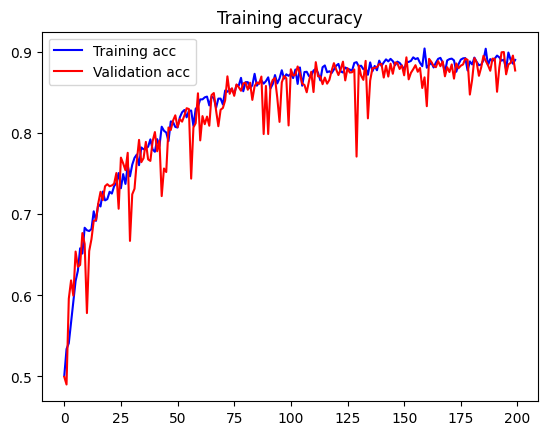

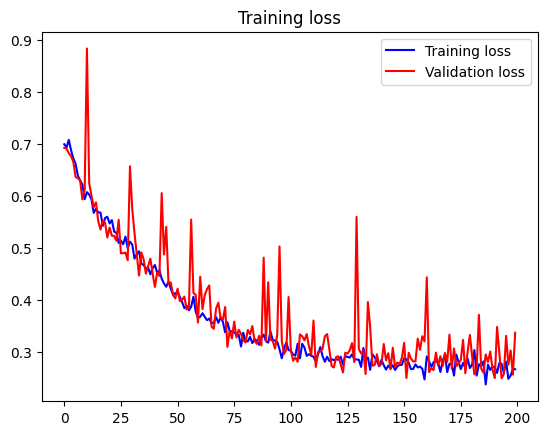

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()
 
plt.show()

In [15]:
test_img = os.listdir(os.path.join(test_dir))
test_img[:10]
test_df = pd.DataFrame({'Image': test_img})

In [16]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 32,
    shuffle = False
)

Found 12500 validated image filenames.


In [17]:
steps = int(np.ceil(12500/32))
predict = model.predict(test_generator, steps=steps)

391/391 [==============================] - 91s 233ms/step


In [18]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['Label'] = train_df['Label'].replace(label_map)

In [19]:
def label(predict):
    if(predict > 0.5):
        return "Dog"
    else:
        return "Cat"

In [20]:
test_df['Label'] = predict
test_df['Label'] = test_df['Label'].apply(label)

In [21]:
test_df.head()

Image Label
0      1.jpg   Dog
1     10.jpg   Cat
2    100.jpg   Dog
3   1000.jpg   Dog
4  10000.jpg   Dog

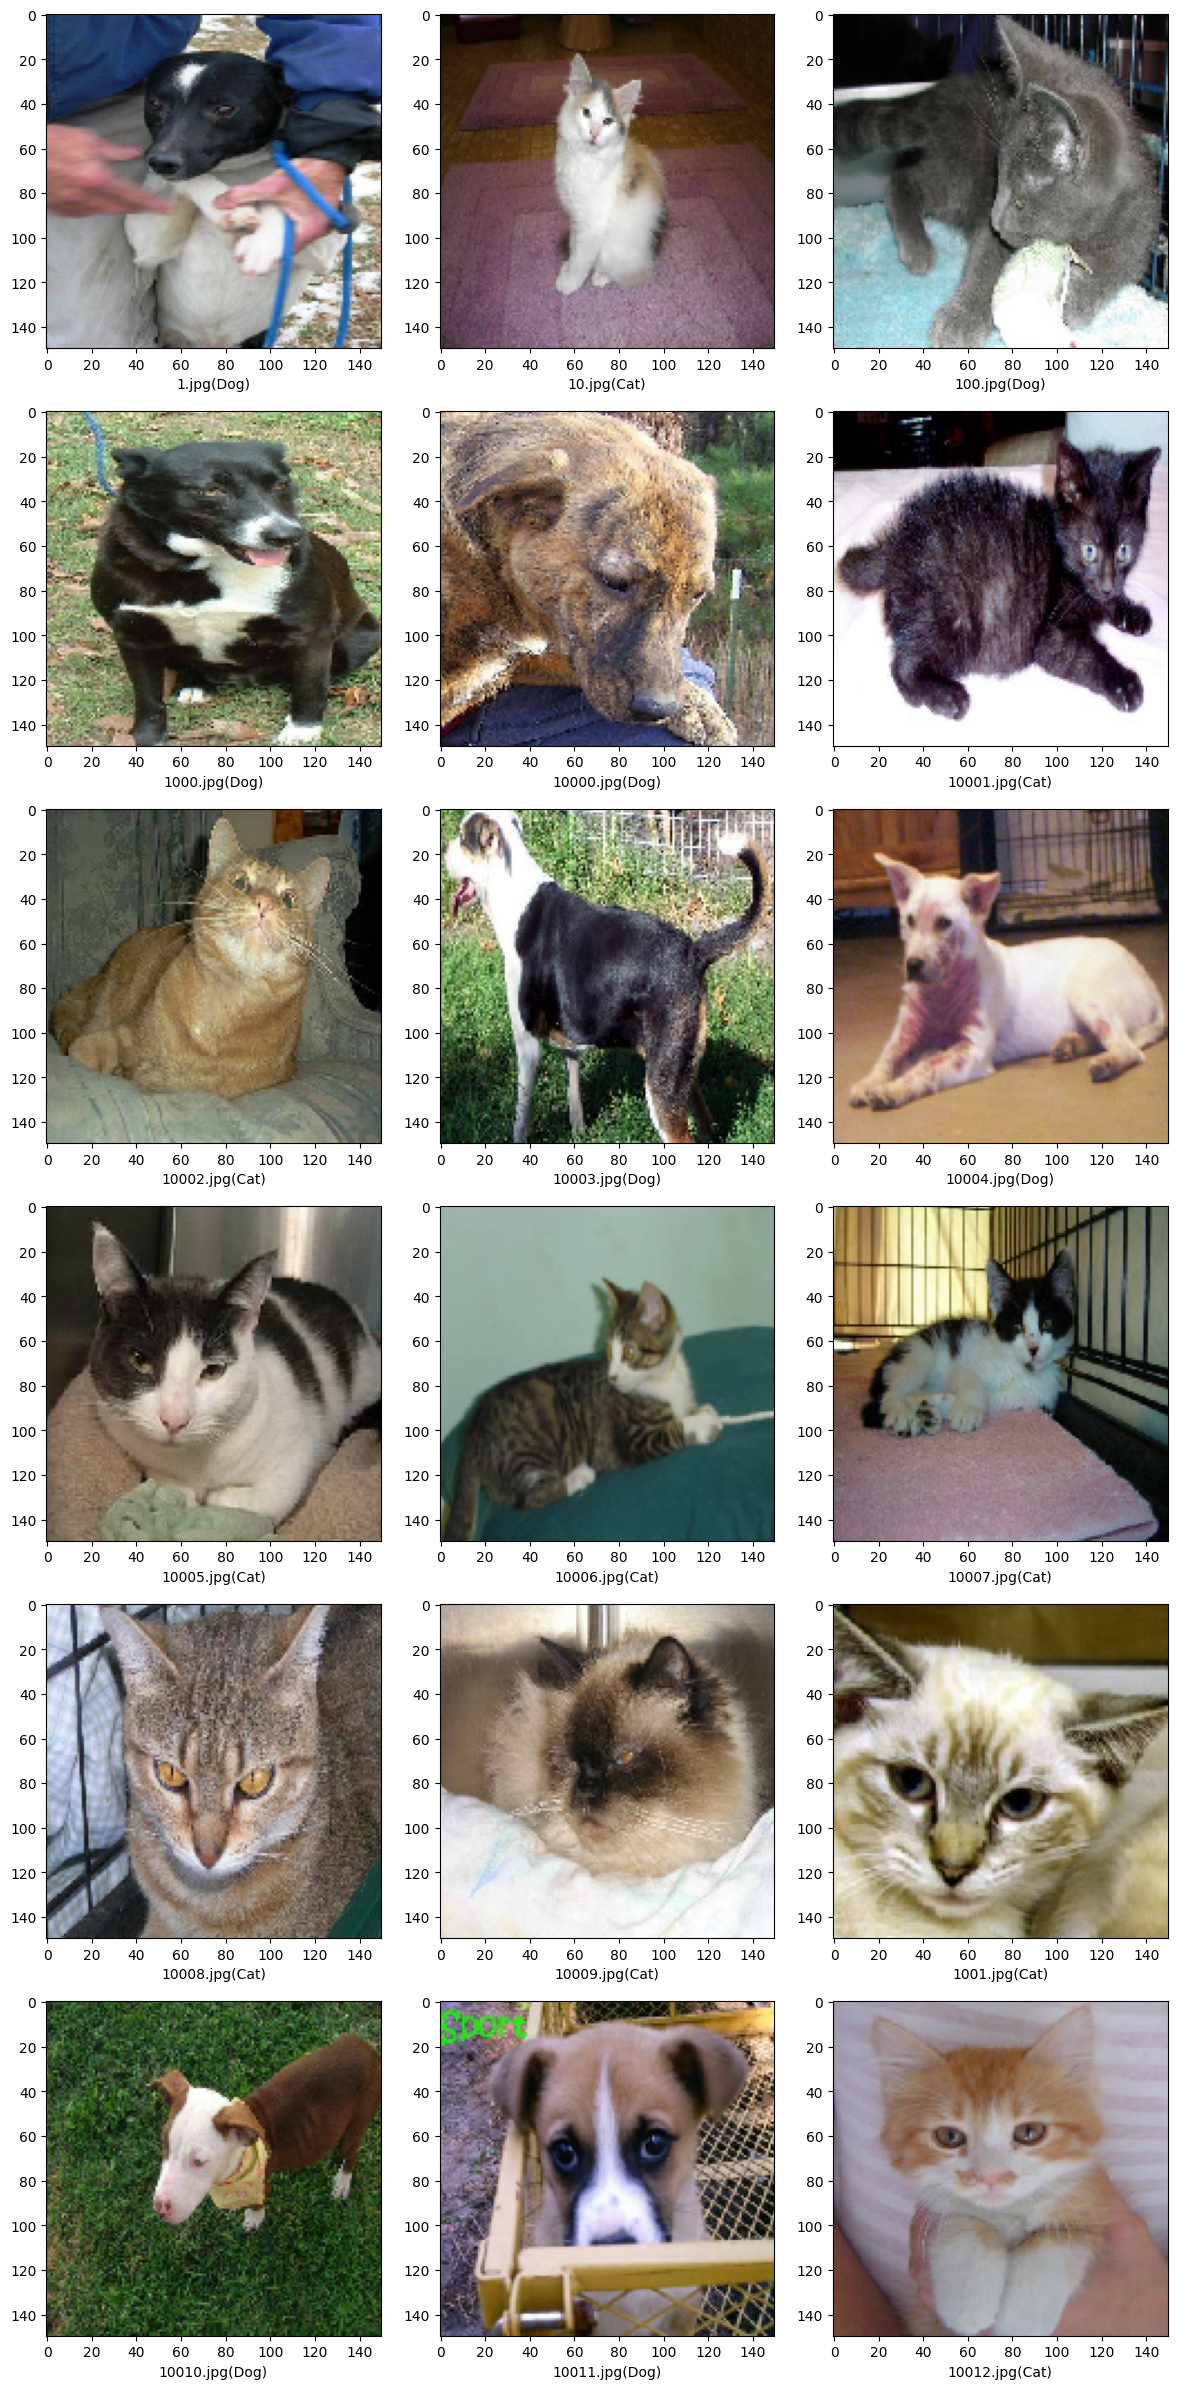

In [22]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img("C:\\Users\\thinh\\Downloads\\test1\\"+filename, target_size=(150,150))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()